### Tutorial 02: Linear Regressiong using PyTorch
Linear regression is used to model the relationship between a **dependent** variable and one or more **independent** variables. It assumes a linear relationship between the dependent and independent variables.


### Predicting Car Fuel Efficiency
Assume that you want to predict the car fuel efficiency based on the **Engine size**, **Car Weight** and **Number of cylinders**. 

| Index | \( x_1 \) (Engine size in liters) | \( x_2 \) (Car weight in pounds) | \( x_3 \) (Number of cylinders) | \( y \) (Fuel efficiency in MPG) |
|-------|------------------------------------|-----------------------------------|---------------------------------|----------------------------------|
| 1     | 2.0                                | 3000                              | 4                               | 30                               |
| 2     | 3.5                                | 4000                              | 6                               | 20                               |
| 3     | 1.8                                | 2800                              | 4                               | 35                               |
| 4     | 2.5                                | 3500                              | 6                               | 25                               |
| 5     | 3.0                                | 3700                              | 6                               | 22                               |



In [16]:
import pandas as pd
data = {
    "x1": [2.0, 3.5, 1.8, 2.5, 3.0],
    "x2": [3000, 4000, 2800, 3500, 3700],
    "x3": [4, 6, 4, 6, 6],
    "y": [30, 20, 35, 25, 22]
}

df = pd.DataFrame(data)
X = df[["x1", "x2", "x3"]]
y = df["y"]

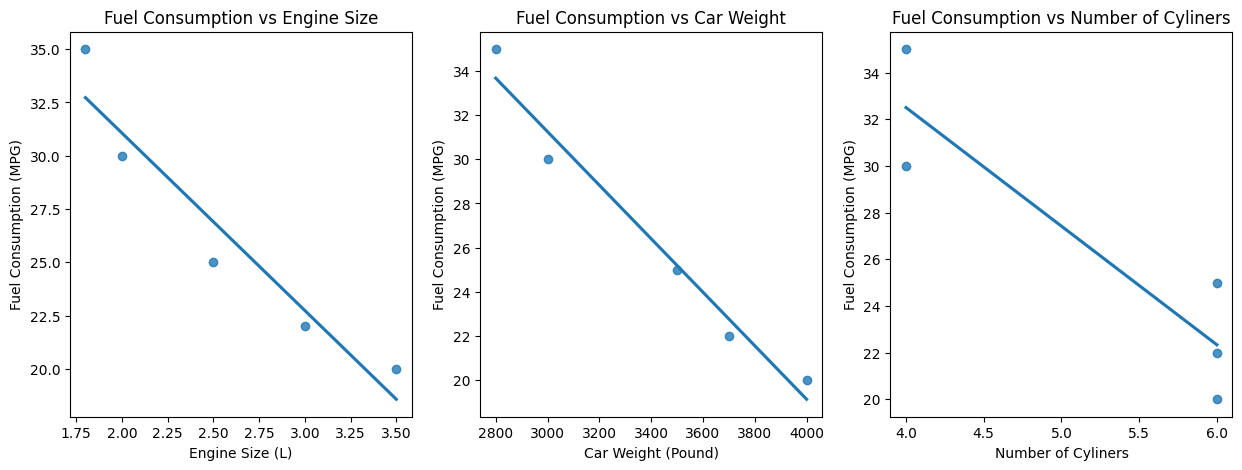

In [17]:
## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.regplot(data = df, x = 'x1', y = 'y', ci = False, ax = axes[0])
axes[0].set_xlabel("Engine Size (L)")
axes[0].set_ylabel("Fuel Consumption (MPG)")
axes[0].set_title("Fuel Consumption vs Engine Size")

sns.regplot(data = df, x = 'x2', y = 'y', ci = False, ax = axes[1])
axes[1].set_xlabel("Car Weight (Pound)")
axes[1].set_ylabel("Fuel Consumption (MPG)")
axes[1].set_title("Fuel Consumption vs Car Weight")

sns.regplot(data = df, x = 'x3', y = 'y', ci = False, ax = axes[2])
axes[2].set_xlabel("Number of Cyliners")
axes[2].set_ylabel("Fuel Consumption (MPG)")
axes[2].set_title("Fuel Consumption vs Number of Cyliners")
plt.show()


The simplest form of regression is considering that the dependent variable is the linear combination of the independent variables (in this example, engine size, car weight, and the number of cylinders).

Mathematically, this is written as:  
$y(x, \omega) = \omega_0 + \omega_1x_1 + \omega_2x_2 + \omega_3x_3$ where:  
- $y(x, \omega)$ is the predicted value of the dependent variable.  
- $\omega_0$ is the intercept (bias term).  
- $\omega_1, \omega_2, \omega_3$ are the coefficients corresponding to the independent variables $x_1, x_2, x_3$ (engine size, car weight, and number of cylinders, respectively).  

In this case, the regression equation models how fuel efficiency ($y$) is influenced by the engine size ($x_1$), car weight ($x_2$), and the number of cylinders ($x_3$).As shown in the graph, the influence (slope) of each independent variable on the dependent variable is different. In other words, the coefficients ($\omega$)represent the strength and direction of these influences and are determined by analyzing the provided data.

---
### Task 1:  
1. **Initialize the coefficients \( \omega_i \)** as random values using PyTorch.  
2. **Compute the predicted value \( y \)** using the formula above.  
3. **Plot the actual values** of \( y \) and the predicted values of \( y \) to visualize the model's accuracy.  





In [18]:
import torch

torch.manual_seed(7)


##### Task 2: Find the Optimal Weights for Accurate Predictions

**Goal**:
Use gradient descent to find the weights that minimize the difference between the predicted values and the actual values. This will optimize the weights and bias to make the prediction as accurate as possible.

**Steps**:
- Initialize the model parameters (weights and bias) randomly.
- Define the loss function (Mean Squared Error).
- Use gradient descent to minimize the loss function and optimize the weights.
- Track the loss over multiple iterations to observe convergence.
- Compare the final predicted values with the actual values after optimization.

In [19]:
import torch.optim as optim
